In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 


# Part a 

In [17]:
# load data1 

data1 = np.load('Data1.npz')
data1.files

['Gene_Name', 'P_value', 'SeqData']

In [18]:
data1['Gene_Name'].shape 

(20131,)

In [19]:
data1['P_value'].shape 

(20131,)

In [20]:
data1['SeqData'].shape 

(20131, 276)

## Select 200 genes 

In [21]:
selected_genes = data1['Gene_Name'][:200]

In [24]:
selected_genes[:20]

array(['CCDC160', 'CYTH3', 'ARHGEF38', 'C12orf5', 'TEX261', 'NEBL',
       'ADIPOR2', 'RB1', 'PPAP2C', 'AP4E1', 'ATP2C2', 'TNFRSF8', 'RGS14',
       'DES', 'LRRC45', 'ITCH', 'C1orf115', 'ZNF780A', 'APOLD1', 'CAMK2A'],
      dtype='<U15')

In [47]:

for ind, gene in enumerate(selected_genes):
    print(gene, end=', ') 
#     print(ind+1, gene)

CCDC160, CYTH3, ARHGEF38, C12orf5, TEX261, NEBL, ADIPOR2, RB1, PPAP2C, AP4E1, ATP2C2, TNFRSF8, RGS14, DES, LRRC45, ITCH, C1orf115, ZNF780A, APOLD1, CAMK2A, NBLA00301, DOCK11, DPP8, ARFGEF2, ISOC1, INMT, SCRG1, MARCH9, SH3RF2, CAMK2G, KCNA1, TPO, PRG4, UPK3B, ANKIB1, DUSP4, MOSC2, LMO4, MEOX2, RAB40B, CCDC80, GLRA2, CTNS, TNP2, HSPB7, IL1RAPL2, ZNF148, CYP2R1, RNF183, FOXA2, KIF5B, PYGB, ADAM10, KIF20B, ZBTB4, ARHGDIA, FAM65C, LBP, KCTD11, CRK, BNC1, ARHGDIG, TTBK2, DNAJC4, WDR81, THOC4, PI16, FAM110C, SSX8, TMEM119, ATP1A2, MAP2K1, CLEC2L, PGRMC1, RALGAPB, ZYG11A, ADH1B, NFKBIB, CDSN, PTGFR, SEMA4A, CRYAB, AQP2, LOC257358, C7orf33, C20orf3, LRIG1, MLLT10, SLC35D3, GPR27, GPR133, DAGLB, LRRC3B, GSR, PI4K2A, DAP, NDRG3, CSNK1G1, CHUK, PGM2L1, GPR112, BEX4, DCTN6, LHFPL5, INTS9, ARHGAP12, SPDEF, HAND2, ZNF781, MFAP1, ZHX3, INPP1, LCN6, NUAK1, LRIT3, PLCH1, LOC220594, NEXN, B3GAT3, ANXA8, ST8SIA6, TAL1, FN3KRP, MAP3K2, GSTP1, USP48, LYPD5, FAM71C, EBF2, C9orf142, SERPINA10, SCGB3A1, RABGEF

In [48]:
top10_enrich = open('top10_enriched.tsv').readlines() 

In [63]:
functions = top10_enrich[9:20]

In [66]:
functions[0]

'Gene Set Name\t# Genes in Gene Set (K)\tDescription\t# Genes in Overlap (k)\tk/K\tp-value\tFDR q-value\n'

In [100]:
for line in functions[1:]:
    func, _, des, *gab = line.split('\t') 
    func_temp = func.split('_')
    func = '\_'.join(func_temp)
    print(r'\textbf{',func, '} \\\ ', f'\n{des}')

\textbf{ GO\_POSITIVE\_REGULATION\_OF\_MOLECULAR\_FUNCTION } \\  
Any process that activates or increases the rate or extent of a molecular function, an elemental biological activity occurring at the molecular level, such as catalysis or binding. [GO:jl]
\textbf{ GO\_REGULATION\_OF\_HYDROLASE\_ACTIVITY } \\  
Any process that modulates the frequency, rate or extent of hydrolase activity, the catalysis of the hydrolysis of various bonds, e.g. C-O, C-N, C-C, phosphoric anhydride bonds, etc. Hydrolase is the systematic name for any enzyme of EC class 3. [EC:3.-.-.-, GOC:ai]
\textbf{ GO\_GOLGI\_APPARATUS } \\  
A membrane-bound cytoplasmic organelle of the endomembrane system that further processes the core oligosaccharides (e.g. N-glycans) added to proteins in the endoplasmic reticulum and packages them into membrane-bound vesicles. The Golgi apparatus operates at the intersection of the secretory, lysosomal, and endocytic pathways. [ISBN:0198506732]
\textbf{ GO\_WHOLE\_MEMBRANE } \\  
An

# Part b

In [101]:
data1.files

['Gene_Name', 'P_value', 'SeqData']

In [112]:

data1['Gene_Name'].shape 

data1['SeqData'].shape 

data1['P_value'].shape 

(20131,)

(20131, 276)

(20131,)

In [113]:
# select first 1000 genes 
selected_1000 = data1['SeqData'][:1000,]

selected_1000_genes = data1['Gene_Name'][:1000]

In [114]:
selected_1000
selected_1000.shape 

array([[ 6.5656,  6.2135,  5.5397, ...,  5.4686,  5.459 ,  3.9284],
       [ 8.9028,  7.9683,  8.8132, ...,  9.3317, 11.9183,  8.4228],
       [ 2.7496,  3.8664,  2.3934, ...,  1.2239,  1.8741,  0.4694],
       ...,
       [ 0.38  ,  0.    ,  0.    , ...,  0.    ,  0.7367,  0.8229],
       [ 2.9316,  0.8112,  0.    , ...,  3.038 ,  5.9459,  3.9284],
       [10.4811,  8.7318,  9.3295, ...,  9.1684,  9.0692,  7.8961]])

(1000, 276)

In [180]:
from sklearn.cluster import KMeans
def plot_his(labels):
    k = len(set(labels))
    plt.rc('font', family='Times New Roman')
    fig, ax = plt.subplots() 
    sns.countplot(y=labels+1,edgecolor=sns.color_palette("dark", 3), palette='Set3', ax=ax)
    ax.set_ylabel('Cluster ID', fontsize=16)
    ax.set_xlabel('Cluster Size', fontsize=16)

    ax.tick_params(axis='y', labelsize=10)
    ax.tick_params(axis='x', labelsize=10)
    ax.set_title(f'Histogram of {k} Clusters', fontsize=18)
    fig.set_size_inches(12, 8)

    plt.savefig(f'{k}_Cluster.png',  # 文件名
    			format='png',  # 图片格式
    			bbox_inches='tight',  # 图片排版
    			dpi=300  # 图片清晰度
    			)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=20, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=50, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

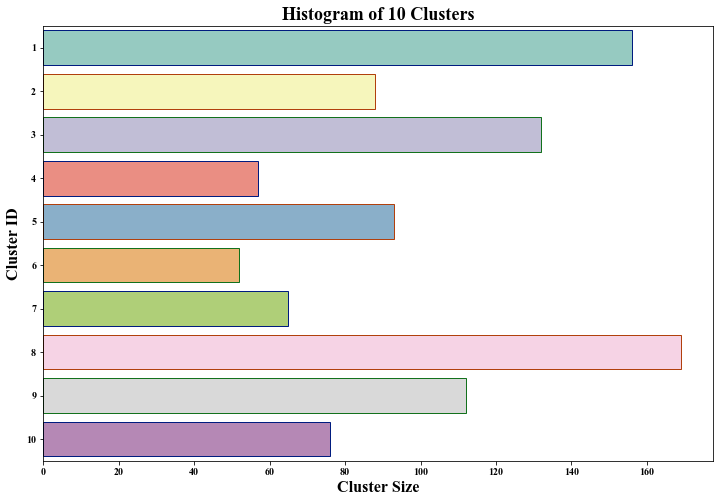

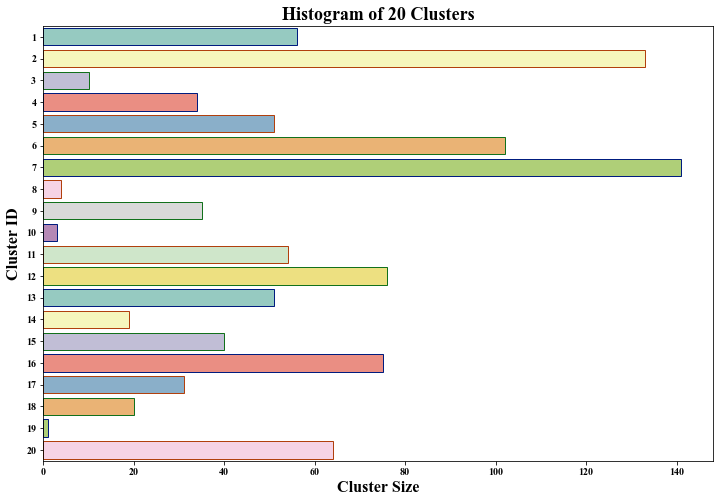

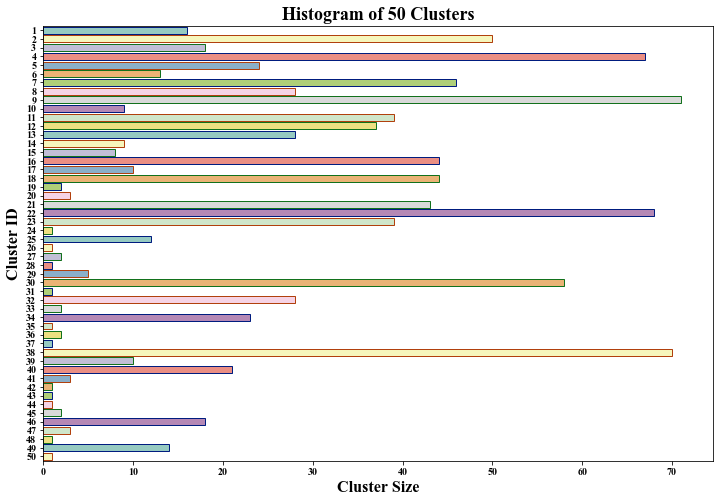

In [181]:
for K in [10, 20, 50]:
    kmeans = KMeans(n_clusters=K, random_state=42)
    kmeans.fit(selected_1000)
    labels = kmeans.labels_
    plot_his(labels)

## k=20

In [184]:
kmeans = KMeans(n_clusters=20, random_state=42)
kmeans.fit(selected_1000)
labels = kmeans.labels_

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=20, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [196]:
for label in range(0, 20):
    print(f'Cluster {label+1}, {sum(labels == label)}')
    for gene in selected_1000_genes[labels == label]:
        print(gene, end=', ')
    print('\n')

Cluster 1, 56
ARHGEF38, CAMK2A, TPO, GLRA2, LHFPL5, KLF17, AHSG, TREML1, C14orf180, TUBAL3, SLC1A6, ART4, TNFSF18, FADS6, C11orf34, TSKS, AQPEP, FAM129C, LOC389332, WFDC12, TCL1A, CTAG1B, AMY2A, TBX5, IGFN1, EPX, CIDEA, CCDC144C, ERVFRDE1, FOXG1, STAB2, HAND1, RERGL, GDNF, NOX1, KCNK4, GPR144, NLRP11, CDHR2, C15orf2, C1orf150, HCG22, PKLR, CELP, CCDC144NL, CSMD1, LOXHD1, NPAS4, EFCAB5, SH2D7, IFNE, ASPA, HTR2A, ALLC, SHH, GAGE12D, 

Cluster 2, 133
C12orf5, PPAP2C, RGS14, LRRC45, DPP8, MARCH9, RAB40B, CTNS, KIF20B, KCTD11, NFKBIB, DAGLB, CHUK, PGM2L1, DCTN6, INTS9, ARHGAP12, ZHX3, NUAK1, MAP3K2, C9orf142, C12orf4, POLD3, LRRC20, UBR1, EGLN3, DSE, KCTD13, FN3K, ZSCAN29, GJB1, EPHX2, LOC729678, CD302, CCDC132, LMTK2, GPM6B, DTNB, PEX3, DAAM1, FLNC, GRAMD4, WDR62, SLC17A5, CCDC127, RCL1, HEXDC, OSBPL11, TADA1, CLDN10, NIN, SETMAR, RHOBTB3, ZKSCAN5, MYO9A, C1orf57, MAD1L1, FBXL18, FAM73A, STC1, BTRC, PTCD1, COG3, SNX7, SNX8, INPP4A, C17orf85, HIBCH, APBB1, TMEM231, SNX29, CRB3, SLC9A6, LRTO

In [241]:
b="""
	
Compute Overlaps for Selected Genes
Converted 51 submitted identifiers into 50 NCBI (Entrez) genes. click here for details.





Collections	# Overlaps Shown	# Gene Sets in Collections	# Genes in Comparison (n)	# Genes in Universe (N)
GO	6	10271	50	40071
Click the gene set name to see the gene set page. Click the number of genes [in brackets] to download the list of genes.

Color bar shading from light green to black, where lighter colors indicate more significant FDR q-values (< 0.05) and black indicates less significant FDR q-values (>= 0.05).

Save to: Text (as Tab separated values; *.tsv)

Gene Set Name [# Genes (K)]	Description	# Genes in Overlap (k)	k/K	p-value 	FDR q-value 
GO_VOLTAGE_GATED_ION_CHANNEL_ACTIVITY [197]	Enables the transmembrane transfer of an ion by a voltage-gated channel. An ion is an atom or group of atoms carrying an electric charge by virtue of having gained or lost one or more electrons. A voltage-gated channel is a channel whose open state is dependent on the voltage across the membrane in which it is embedded. [GOC:mtg_transport, ISBN:0198506732, ISBN:0815340729]	5	     	4.83 e-6	2.89 e-2
GO_CIRCULATORY_SYSTEM_PROCESS [576]	A organ system process carried out by any of the organs or tissues of the circulatory system. The circulatory system is an organ system that moves extracellular fluids to and from tissue within a multicellular organism. [GOC:mtg_cardio]	7	  	7.15 e-6	2.89 e-2
GO_CATION_CHANNEL_COMPLEX [221]	An ion channel complex through which cations pass. [GOC:mah]	5	    	8.44 e-6	2.89 e-2
GO_METAL_ION_TRANSMEMBRANE_TRANSPORTERTER_ACTIVITY [428]	Enables the transfer of metal ions from one side of a membrane to the other. [GOC:ai]	6	  	1.53 e-5	3.93 e-2
GO_ATP_ACTIVATED_INWARD_RECTIFIER_POTAOTASSIUM_CHANNEL_ACTIVITY [6]	Enables the transmembrane transfer of a potassium ion by an inwardly-rectifying voltage-gated channel, where the inward rectification is due to a voltage-dependent block of the channel pore by ATP. An inwardly rectifying current-voltage relation is one where at any given driving force the inward flow of K+ ions exceeds the outward flow for the opposite driving force. [GOC:cb, GOC:mah]	2	            	2.28 e-5	4.69 e-2
GO_VOLTAGE_GATED_CATION_CHANNEL_ACTIVIVITY [140]	Enables the transmembrane transfer of a cation by a voltage-gated channel. A cation is a positively charged ion. A voltage-gated channel is a channel whose open state is dependent on the voltage across the membrane in which it is embedded. [GOC:mtg_transport, ISBN:0815340729]	4	     	2.9 e-5	4.97 e-2




"""

In [242]:
for i in b.split('\n'):
    for word in i.split():
#         print(word)
        if '_' in word and word.startswith('GO'):
            temp = word.split('_')
            temp = '\_'.join(temp)
            print(temp, end="\\\ \n")

GO\_VOLTAGE\_GATED\_ION\_CHANNEL\_ACTIVITY\\ 
GO\_CIRCULATORY\_SYSTEM\_PROCESS\\ 
GO\_CATION\_CHANNEL\_COMPLEX\\ 
GO\_METAL\_ION\_TRANSMEMBRANE\_TRANSPORTERTER\_ACTIVITY\\ 
GO\_ATP\_ACTIVATED\_INWARD\_RECTIFIER\_POTAOTASSIUM\_CHANNEL\_ACTIVITY\\ 
GO\_VOLTAGE\_GATED\_CATION\_CHANNEL\_ACTIVIVITY\\ 


# Part c 

## KNN

In [313]:
# file Q3_1_2 

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np


def main(data2, k, flag):
    data2 = np.load(data2)

    if flag:
        train_data, train_label = data2['training_data'], data2[
            'training_label']
        test_data, test_label = data2['testing_data'], data2['testing_label']
    else:
        train_data, train_label = data2['training_data'][:, :1000], data2[
            'training_label'][:1000]
        test_data, test_label = data2['testing_data'][:, :1000], data2[
            'testing_label'][:1000]

    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_data, y=train_label)
    pred = knn.predict(test_data)
    return f'{accuracy_score(test_label, pred):e}'

In [271]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
data2 = np.load('Data2.npz')

In [244]:
data2.files

['Gene_Name',
 'P_value',
 'training_data',
 'training_label',
 'testing_data',
 'testing_label']

In [249]:
data2['Gene_Name'].shape 
data2['P_value'].shape 

(20131,)

(20131,)

In [287]:
train_data = data2['training_data']
train_label = data2['training_label']
test_data = data2['testing_data']
test_label = data2['testing_label']

In [275]:
for k in [1,3,5]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_data, y=train_label)
    pred  = knn.predict(test_data)
    print(f'{k} & {accuracy_score(test_label, pred):e}\\\ \n')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

1 & 6.216216e-01\\ 



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

3 & 6.486486e-01\\ 



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

5 & 6.216216e-01\\ 



In [283]:
# select 1000 genes 

number  = 1000 
train_1000data, train_1000label =  train_data[:,:number], train_label[:number]
test_1000data, test_1000label = test_data[:,:number], test_label[:number]

In [304]:
for k in [1,3,5]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_1000data, y=train_1000label)
    pred  = knn.predict(test_1000data)
    print(f'{k} & {accuracy_score(test_1000label, pred):e}\\\ \n')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

1 & 6.756757e-01\\ 



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

3 & 7.027027e-01\\ 



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

5 & 7.027027e-01\\ 



## SVM

In [294]:
from sklearn.svm import LinearSVC

In [306]:
svm = LinearSVC(max_iter=5000, random_state=42)

In [307]:
svm.fit(train_1000data, train_1000label)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=5000,
          multi_class='ovr', penalty='l2', random_state=42, tol=0.0001,
          verbose=0)

In [310]:
print(f'{accuracy_score(test_1000label, svm.predict(test_1000data)):e}' )

6.216216e-01


In [318]:
# load Q3_3 

from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
import numpy as np



def main(data2):
    """ Conduct SVM for data2

    :param data2: data2 file
    :type data2: str
    :return: accuracy of prediction
    :rtype: str
    """
    data2 = np.load(data2)
    train_data, train_label = data2['training_data'][:, :1000], data2[
        'training_label'][:1000]
    test_data, test_label = data2['testing_data'][:, :1000], data2[
        'testing_label'][:1000]

    svm = LinearSVC(max_iter=5000, random_state=42)
    svm.fit(train_data, train_label)

    return f'{accuracy_score(test_label, svm.predict(test_data)):e}'